# ![Keras](https://img.shields.io/badge/Keras-%23D00000.svg?style=for-the-badge&logo=Keras&logoColor=white) **CHAPTER 10 - INTRODUCTION TO ARTIFICIAL NEURAL NETWORKS WITH KERAS**

---

## **SETUP:**

In [1]:
# %load ../initial_settings.py
"""
Initial settings for data analysis and machine learning.
Use this with: %load ../initial_settings.py
"""

import os
import sys
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from packaging import version

# This notebook requires Python 3.7 or above and Scikit-Learn 1.0.1 or above.
assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# And TensorFlow 2.8 or above.
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Graphviz source.
os.environ["PATH"] += os.pathsep + "C:/Programy/Graphviz/bin/"

# Default settings for matplotlib.
DARK_BLUE = "#03002e"
LIGHT_GRAY = "#8f8f99"

plt.rc("font", size=14)
plt.rc("legend", fontsize=14)
plt.rc("text", color=DARK_BLUE)

plt.rc("axes", labelsize=14)
plt.rc("axes", titlesize=14)
plt.rc("axes", labelpad=10)
plt.rc("axes", labelcolor=DARK_BLUE)
plt.rc("axes", grid=True)

plt.rc("xtick", labelsize=12, color=DARK_BLUE)
plt.rc("ytick", labelsize=12, color=DARK_BLUE)
plt.rc("xtick.major", pad=10)
plt.rc("ytick.major", pad=10)

plt.rc("grid", color=LIGHT_GRAY)
plt.rc("grid", linestyle="dashed")
plt.rc("grid", linewidth=0.5)
plt.rc("grid", alpha=0.5)

# Create a directory for matplotlib images.
IMAGES_PATH = Path("images")
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id, tight_layout=True, fig_extension="png", resolution=300, facecolor="w"
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, facecolor=facecolor)


---

## **FROM BIOLOGICAL TO ARTIFICIAL NEURONS:**

### **THE PERCEPTRON:**

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 0  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

In [3]:
# extra code – shows how to build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(
    loss="perceptron", penalty=None, learning_rate="constant", eta0=1, random_state=42
)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()


When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

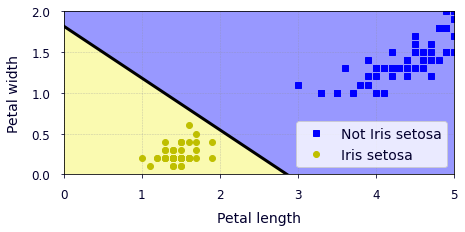

In [4]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(["#9898ff", "#fafab0"])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()


### **ACTIVATION FUNCTIONS:**

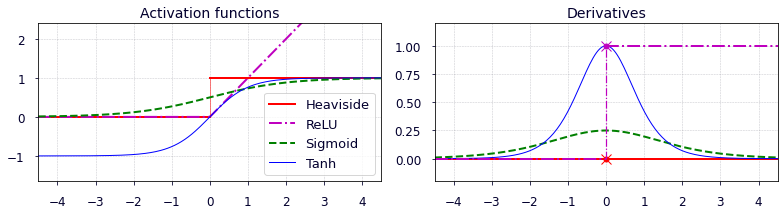

In [5]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid


def relu(z):
    return np.maximum(0, z)


def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)


max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()


---

## **REGRESSION MLPs:**

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)


---

## **CLASSIFICATION MLPs:**

In [7]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy


1.0

---

## **BUILDING MLPs WITH KERAS:**

### **BUILDING AN IMAGE CLASSIFIER USING THE SEQUENTIAL API:**

#### **USING KERAS TO LOAD THE DATASET:**

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [9]:
X_train.shape


(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train.dtype


dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [11]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0


You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

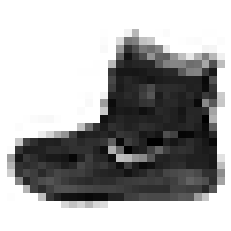

In [12]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()


The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train


array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


So the first image in the training set is an ankle boot:

In [15]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

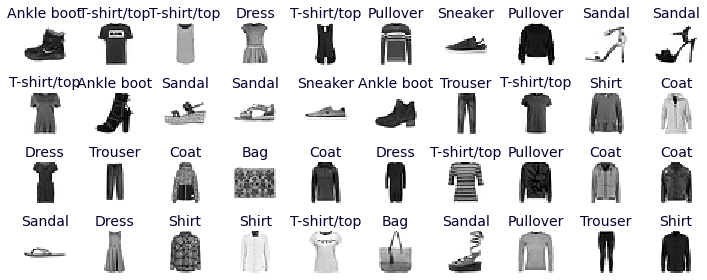

In [16]:
n_rows, n_cols = 4, 10
plt.figure(figsize=(n_cols, n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()


#### **CREATING THE MODEL USING THE SEQUENTIAL API:**

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


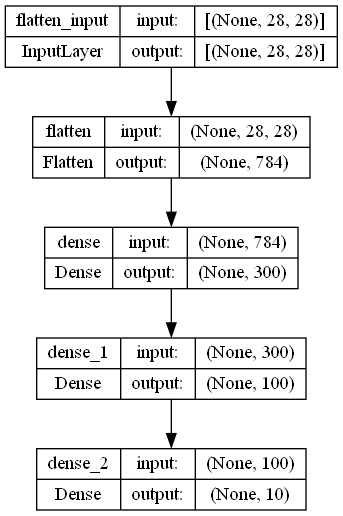

In [20]:
tf.keras.utils.plot_model(model, "images/my_fashion_mnist_model.png", show_shapes=True)


In [21]:
model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer("dense") is hidden1


True

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01645468, -0.06813422,  0.01170718, ...,  0.02082995,
        -0.0560083 , -0.01672539],
       [ 0.01341388,  0.05079025, -0.01869758, ..., -0.03610948,
        -0.06299131,  0.0603549 ],
       [ 0.00513266,  0.05583337,  0.04468029, ..., -0.00138228,
        -0.0326555 , -0.07354385],
       ...,
       [-0.02000315,  0.01102023,  0.04589748, ...,  0.0694903 ,
        -0.05121062, -0.01250533],
       [-0.01862317, -0.01476263,  0.03332251, ...,  0.06518248,
         0.0628998 , -0.06573164],
       [ 0.06968552, -0.02550798, -0.04241037, ..., -0.00979598,
        -0.00245433, -0.0735506 ]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

#### **COMPILING THE MODEL:**

In [28]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"],
)


This is equivalent to:

In [29]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy],
)


In [30]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [31]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    ],
    axis=1,
)


array([0, 5, 1, 0], dtype=int64)

#### **TRAINING AND EVALUATING THE MODEL:**

In [32]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
)


Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7162 - sparse_categorical_accuracy: 0.7649 - val_loss: 0.5044 - val_sparse_categorical_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4872 - sparse_categorical_accuracy: 0.8309 - val_loss: 0.4601 - val_sparse_categorical_accuracy: 0.8342
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4411 - sparse_categorical_accuracy: 0.8449 - val_loss: 0.4255 - val_sparse_categorical_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4168 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.3970 - val_sparse_categorical_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3925 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3795 - spars

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


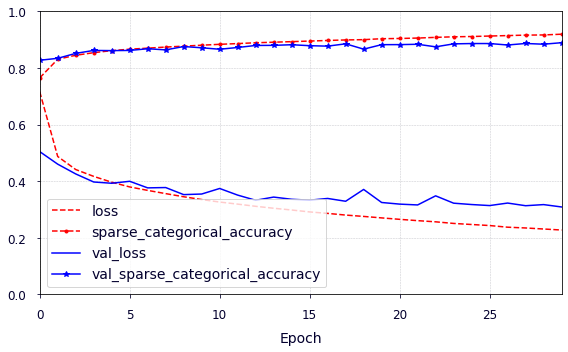

In [35]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],
)
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()


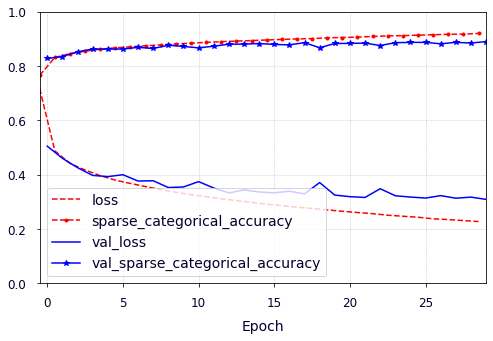

In [36]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0.0, 1])
plt.legend(loc="lower left")
plt.show()


In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3267 - sparse_categorical_accuracy: 0.8847


[0.3266528844833374, 0.8847000002861023]

#### **USING THE MODEL TO MAKE PREDICTIONS:**

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 94ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

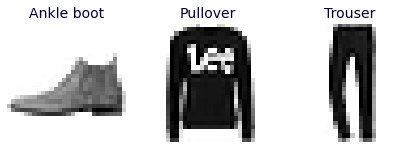

In [42]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("fashion_mnist_images_plot", tight_layout=False)
plt.show()


### **BUILDING A REGRESSION MLP USING THE SEQUENTIAL API:**

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [43]:
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)


In [44]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss="mse", metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9589 - root_mean_squared_error: 0.9792 - val_loss: 0.9464 - val_root_mean_squared_error: 0.9728
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3859 - root_mean_squared_error: 0.6212 - val_loss: 1.6525 - val_root_mean_squared_error: 1.2855
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3657 - root_mean_squared_error: 0.6047 - val_loss: 0.3448 - val_root_mean_squared_error: 0.5872
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3451 - root_mean_squared_error: 0.5874 - val_loss: 1.1383 - val_root_mean_squared_error: 1.0669
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3322 - root_mean_squared_error: 0.5763 - val_loss: 2.9808 - val_root_mean_squared_error: 1.7265
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3465 - root_mean_squared_error: 0.5886 - val_loss: 0.9953 - val_

In [45]:
rmse_test

0.5339433550834656

In [46]:
y_pred

array([[0.5344787],
       [0.994818 ],
       [5.0979853]], dtype=float32)

### **BUILDING COMPLEX MODELS USING THE FUNCTIONAL API:**

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [47]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
)
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2477 - root_mean_squared_error: 1.1170 - val_loss: 2.9113 - val_root_mean_squared_error: 1.7062
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4687 - root_mean_squared_error: 0.6846 - val_loss: 1.7614 - val_root_mean_squared_error: 1.3272
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4023 - root_mean_squared_error: 0.6343 - val_loss: 0.5310 - val_root_mean_squared_error: 0.7287
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3690 - root_mean_squared_error: 0.6075 - val_loss: 0.3532 - val_root_mean_squared_error: 0.5943
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3540 - root_mean_squared_error: 0.5949 - val_loss: 0.3401 - val_root_mean_squared_error: 0.5832
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3429 - root_mean_squared_error: 0.5856 - val_loss: 0.4221 - val_

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [49]:
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])


In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4839 - root_mean_squared_error: 1.2181 - val_loss: 3.4289 - val_root_mean_squared_error: 1.8517
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5215 - root_mean_squared_error: 0.7221 - val_loss: 0.6736 - val_root_mean_squared_error: 0.8207
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4418 - root_mean_squared_error: 0.6647 - val_loss: 0.5562 - val_root_mean_squared_error: 0.7458
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4042 - root_mean_squared_error: 0.6358 - val_loss: 0.4224 - val_root_mean_squared_error: 0.6499
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3914 - root_mean_squared_error: 0.6256 - val_loss: 0.4602 - val_root_mean_squared_error: 0.6784
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3797 - root_mean_squared_error: 0.6162 - val_loss: 0.4093 - val_

Adding an auxiliary output for regularization:

In [51]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])


In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=("mse", "mse"),
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"],
)

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)


Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.8557 - dense_2_loss: 1.7963 - dense_3_loss: 2.3902 - dense_2_root_mean_squared_error: 1.3403 - dense_3_root_mean_squared_error: 1.5460 - val_loss: 0.9310 - val_dense_2_loss: 0.6276 - val_dense_3_loss: 3.6613 - val_dense_2_root_mean_squared_error: 0.7922 - val_dense_3_root_mean_squared_error: 1.9135
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5359 - dense_2_loss: 0.5098 - dense_3_loss: 0.7703 - dense_2_root_mean_squared_error: 0.7140 - dense_3_root_mean_squared_error: 0.8777 - val_loss: 0.6194 - val_dense_2_loss: 0.4714 - val_dense_3_loss: 1.9514 - val_dense_2_root_mean_squared_error: 0.6866 - val_dense_3_root_mean_squared_error: 1.3969
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4544 - dense_2_loss: 0.4383 - dense_3_loss: 0.5995 - dense_2_root_mean_squared_error: 0.6620 - dense_3_root_mean_squared_error: 0.7743 - val_loss: 0.5267 - val_dense_2_loss

In [53]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results


162/162 [==============================] - 0s 1ms/step - loss: 0.3349 - dense_2_loss: 0.3288 - dense_3_loss: 0.3901 - dense_2_root_mean_squared_error: 0.5734 - dense_3_root_mean_squared_error: 0.6246


In [54]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 60ms/step


In [55]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 48ms/step


### **USING THE SUBCLASSING API TO BUILD DYNAMIC MODELS:**

In [56]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units=units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units=units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")


In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss="mse",
    loss_weights=[0.9, 0.1],
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"],
)
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8414 - output_1_loss: 1.8175 - output_2_loss: 2.0564 - output_1_root_mean_squared_error: 1.3481 - output_2_root_mean_squared_error: 1.4340 - val_loss: 1.2784 - val_output_1_loss: 0.7871 - val_output_2_loss: 5.6999 - val_output_1_root_mean_squared_error: 0.8872 - val_output_2_root_mean_squared_error: 2.3874
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6052 - output_1_loss: 0.5669 - output_2_loss: 0.9505 - output_1_root_mean_squared_error: 0.7529 - output_2_root_mean_squared_error: 0.9749 - val_loss: 1.1775 - val_output_1_loss: 0.9282 - val_output_2_loss: 3.4212 - val_output_1_root_mean_squared_error: 0.9634 - val_output_2_root_mean_squared_error: 1.8497
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4849 - output_1_loss: 0.4594 - output_2_loss: 0.7141 - output_1_root_mean_squared_error: 0.6778 - output_2_root_mean_squared_error: 0.8451 - val_loss: 0.663

### **SAVING AND RESTORING A MODEL:**

In [58]:
# extra code – delete the directory, in case it already exists
import shutil

shutil.rmtree("models/my_keras_model", ignore_errors=True)


In [59]:
model.save("models/my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: models/my_keras_model\assets


INFO:tensorflow:Assets written to: models/my_keras_model\assets


In [61]:
for path in sorted(Path("models/my_keras_model").glob("**/*")):
    print(path)

models\my_keras_model\assets
models\my_keras_model\fingerprint.pb
models\my_keras_model\keras_metadata.pb
models\my_keras_model\saved_model.pb
models\my_keras_model\variables
models\my_keras_model\variables\variables.data-00000-of-00001
models\my_keras_model\variables\variables.index


In [62]:
model = tf.keras.models.load_model("models/my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 70ms/step


In [63]:
model.save_weights("weights/my_weights")

In [64]:
model.load_weights("weights/my_weights")

In [65]:
# extra code – show the list of my_weights.* files
for path in sorted(Path("weights").glob("my_weights.*")):
    print(path)

weights\my_weights.data-00000-of-00001
weights\my_weights.index


### **USING CALLBACKS:**

In [66]:
shutil.rmtree("checkpoints/my_checkpoints", ignore_errors=True)  # extra code

In [67]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "checkpoints/my_checkpoints", save_weights_only=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb],
)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.3646 - output_1_loss: 0.3548 - output_2_loss: 0.4522 - output_1_root_mean_squared_error: 0.5957 - output_2_root_mean_squared_error: 0.6725 - val_loss: 0.6834 - val_output_1_loss: 0.6962 - val_output_2_loss: 0.5690 - val_output_1_root_mean_squared_error: 0.8344 - val_output_2_root_mean_squared_error: 0.7543
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3610 - output_1_loss: 0.3525 - output_2_loss: 0.4377 - output_1_root_mean_squared_error: 0.5937 - output_2_root_mean_squared_error: 0.6616 - val_loss: 0.7692 - val_output_1_loss: 0.7554 - val_output_2_loss: 0.8928 - val_output_1_root_mean_squared_error: 0.8692 - val_output_2_root_mean_squared_error: 0.9449
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3551 - output_1_loss: 0.3467 - output_2_loss: 0.4312 - output_1_root_mean_squared_error: 0.5888 - output_2_root_mean_squared_error: 0.6566 - val_loss: 0.483

In [68]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb],
)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3304 - output_1_loss: 0.3237 - output_2_loss: 0.3909 - output_1_root_mean_squared_error: 0.5689 - output_2_root_mean_squared_error: 0.6252 - val_loss: 0.6598 - val_output_1_loss: 0.6902 - val_output_2_loss: 0.3864 - val_output_1_root_mean_squared_error: 0.8308 - val_output_2_root_mean_squared_error: 0.6216
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3318 - output_1_loss: 0.3254 - output_2_loss: 0.3886 - output_1_root_mean_squared_error: 0.5705 - output_2_root_mean_squared_error: 0.6234 - val_loss: 0.7441 - val_output_1_loss: 0.7429 - val_output_2_loss: 0.7551 - val_output_1_root_mean_squared_error: 0.8619 - val_output_2_root_mean_squared_error: 0.8690
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3274 - output_1_loss: 0.3209 - output_2_loss: 0.3857 - output_1_root_mean_squared_error: 0.5665 - output_2_root_mean_squared_error: 0.6211 - val_loss: 0.

In [70]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch {epoch}: val_loss/train_loss: {ratio:.2f}")


In [71]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0,
)


Epoch 0: val_loss/train_loss: 1.57
Epoch 1: val_loss/train_loss: 0.98
Epoch 2: val_loss/train_loss: 1.27
Epoch 3: val_loss/train_loss: 1.13
Epoch 4: val_loss/train_loss: 1.37
Epoch 5: val_loss/train_loss: 1.29
Epoch 6: val_loss/train_loss: 2.30
Epoch 7: val_loss/train_loss: 2.15
Epoch 8: val_loss/train_loss: 3.97
Epoch 9: val_loss/train_loss: 1.30


---

## **USING TENSORBOARD FOR VISUALIZATION:**

In [72]:
shutil.rmtree("logs", ignore_errors=True)


In [73]:
from pathlib import Path
from time import strftime


def get_run_logdir(root_logdir="logs"):
    return Path(root_logdir) / strftime("run_%Y-%m-%d_%H_%M_%S")


# logdir_path = lambda root_logdir: Path(root_logdir) / strftime("run_%Y-%m-%d_%H_%M_%S")
run_logdir = get_run_logdir()


In [74]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential(
    [
        norm_layer,
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(1),
    ],
)

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb],
)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8471 - root_mean_squared_error: 1.3591 - val_loss: 0.8600 - val_root_mean_squared_error: 0.9273
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7967 - root_mean_squared_error: 0.8926 - val_loss: 0.7080 - val_root_mean_squared_error: 0.8414
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7088 - root_mean_squared_error: 0.8419 - val_loss: 0.6450 - val_root_mean_squared_error: 0.8031
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6531 - root_mean_squared_error: 0.8082 - val_loss: 0.6014 - val_root_mean_squared_error: 0.7755
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6135 - root_mean_squared_error: 0.7832 - val_loss: 0.5665 - val_root_mean_squared_error: 0.7527
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5805 - root_mean_squared_error: 0.7619 - val_loss: 0.5393 - val_

In [78]:
print("logs")
for path in sorted(Path("logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])


logs
  run_2023-03-05_15_22_00
    events.out.tfevents.1678026203.PREDATOR.profile-empty
    plugins
      profile
        2023_03_05_14_23_23
          PREDATOR.xplane.pb
    train
      events.out.tfevents.1678026202.PREDATOR.10368.0.v2
    validation
      events.out.tfevents.1678026203.PREDATOR.10368.1.v2


Mateusz: It's better to run this from terminal.

`tensorboard --logdir=./logs --host=localhost --port=6006 &` 

**Note**: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [79]:
from IPython.display import display, HTML

display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

You can use also visualize histograms, images, text, and even listen to audio using TensorBoard:

In [80]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


You can share your TensorBoard logs with the world by uploading them to https://tensorboard.dev/. For this, you can run the `tensorboard dev upload` command, with the `--logdir` and `--one_shot` options, and optionally the `--name` and `--description` options. The first time, it will ask you to accept Google's Terms of Service, and to authenticate.

Notes:
* Authenticating requires user input. Colab supports user input from shell commands, but the main other Jupyter environments do not, so for them we use a hackish workaround (alternatively, you could run the command in a terminal window, after you make sure to activate this project's conda environment and move to this notebook's directory).
* If you get an authentication related error (such as *invalid_grant: Bad Request*), it's likely that your login session has expired. In this case, try running the command `tensorboard dev auth revoke` to logout, and try again.

In [82]:
from tensorboard.main import run_main

argv = "tensorboard dev upload --logdir ./logs --one_shot".split()
argv += ["--name", "Quick test", "--description", "This is a test"]
try:
    original_sys_argv_and_sys_exit = sys.argv, sys.exit
    sys.argv, sys.exit = argv, lambda status: None
    run_main()
finally:
    sys.argv, sys.exit = original_sys_argv_and_sys_exit



New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/9wb7lnjuRvirsnGnwh40rA/

[2023-03-05T15:46:20] Started scanning logdir.
[2023-03-05T15:46:24] Total uploaded: 1120 scalars, 2000 tensors (1.2 MB), 1 binary objects (32.8 kB)
[2023-03-05T15:46:24] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/9wb7lnjuRvirsnGnwh40rA/


You can get list your published experiments:

In [83]:
!tensorboard dev list

https://tensorboard.dev/experiment/9wb7lnjuRvirsnGnwh40rA/
	Name                 Quick test
	Description          This is a test
	Id                   9wb7lnjuRvirsnGnwh40rA
	Created              2023-03-05 15:46:20 (1 minute ago)
	Updated              2023-03-05 15:46:24 (59 seconds ago)
	Runs                 3
	Tags                 8
	Scalars              1120
	Tensor bytes         1421436
	Binary object bytes  33791
https://tensorboard.dev/experiment/MIDVN768TJSAev5YuGI2Bw/
	Name                 Quick test
	Description          This is a test
	Id                   MIDVN768TJSAev5YuGI2Bw
	Created              2023-03-05 15:45:19 (2 minutes ago)
	Updated              2023-03-05 15:45:23 (2 minutes ago)
	Runs                 3
	Tags                 8
	Scalars              1120
	Tensor bytes         1421436
	Binary object bytes  33791


Total: 2 experiment(s)


To delete an experiment, use the following command:

```python
!tensorboard dev delete --experiment_id <experiment_id>
```

When you stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID:

In [86]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir my_fashion_mnisthyperbandtensorboard (started 7 days, 18:43:55 ago; pid 10872)
  - port 6006: logdir ./my_logs (started 7 days, 22:28:45 ago; pid 11952)
  - port 6006: logdir ./my_cifar10_logs (started 1 day, 0:42:14 ago; pid 12556)
  - port 6006: logdir ./my_cifar10_logs (started 1 day, 0:06:01 ago; pid 13464)
  - port 6006: logdir ./logs (started 0:12:01 ago; pid 15072)
  - port 6006: logdir ./logs (started 0:11:11 ago; pid 15960)
  - port 6006: logdir ./my_mnist_logs (started 7 days, 18:13:30 ago; pid 4748)
  - port 6002: logdir ./my_mnist_logs (started 7 days, 18:10:29 ago; pid 4988)
  - port 8088: logdir ./my_mnist_logs (started 7 days, 18:07:24 ago; pid 6704)
  - port 6006: logdir ./my_cifar10_logs (started 1 day, 0:08:49 ago; pid 7608)
  - port 6006: logdir my_mnist_logs (started 7 days, 18:12:12 ago; pid 7936)
  - port 6002: logdir ./my_mnist_logs/run_001 (started 7 days, 18:09:25 ago; pid 9740)


Next you can use the following command on Linux or MacOSX, replacing `<pid>` with the pid listed above:

    !kill <pid>

On Windows:

    !taskkill /F /PID <pid>

---

## **FINE-TUNING NEURAL NETWORK HYPERPARAMETERS:**

In this section we'll use the Fashion MNIST dataset again:

In [87]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [95]:
import keras_tuner as kt

tf.keras.backend.clear_session()
tf.random.set_seed(42)


def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float(
        "learning_rate", min_value=1e-4, max_value=1e-2, sampling="log"
    )
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )

    return model


In [96]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="keras_tuner/my_fashion_mnist",
    project_name="mr_rnd_search",
    seed=42,
)
random_search_tuner.search(
    X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)
)


Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.8399999737739563

Best val_accuracy So Far: 0.8610000014305115
Total elapsed time: 00h 02m 30s
INFO:tensorflow:Oracle triggered exit


I0305 16:08:29.190141 20000 2535291503.py:10] Oracle triggered exit


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]


In [102]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values


{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [103]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()


Trial summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8610000014305115


In [106]:
best_trial.metrics.get_last_value("val_accuracy")

0.8610000014305115

In [115]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3693 - accuracy: 0.8674
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3610 - accuracy: 0.8705
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3534 - accuracy: 0.8740
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3468 - accuracy: 0.8749
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3433 - accuracy: 0.8763
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3364 - accuracy: 0.8782
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3320 - accuracy: 0.8808
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3279 - accuracy: 0.8810
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3237 - accuracy: 0.8831
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4120 

In [118]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)


In [120]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    overwrite=True,
    directory="keras_tuner/my_fashion_mnist",
    project_name="hyperband",
)

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb],
)


Trial 60 Complete [00h 00m 35s]
val_accuracy: 0.8299999833106995

Best val_accuracy So Far: 0.8823999762535095
Total elapsed time: 00h 15m 19s
INFO:tensorflow:Oracle triggered exit


I0305 16:45:12.219370 20000 280322460.py:16] Oracle triggered exit


In [121]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_trials=10,
    alpha=1e-4,
    beta=2.6,
    overwrite=True,
    directory="keras_tuner/my_fashion_mnist",
    project_name="bayesian_opt",
)
bayesian_opt_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb],
)


Trial 10 Complete [00h 00m 34s]
val_accuracy: 0.8456000089645386

Best val_accuracy So Far: 0.8628000020980835
Total elapsed time: 00h 04m 42s
INFO:tensorflow:Oracle triggered exit


I0305 16:51:19.495434 20000 1942228349.py:12] Oracle triggered exit
